In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

salarios={'Salários':[10,20,30,40,50,60,70,80,90,100,5]}
df=pd.DataFrame(salarios)

display(df)

,Salários
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [40]:
# Função para análise descritiva completa
def analise_descritiva(df):
    print(f"\n=== Análise dos Salários ===")
    print(f"Média: {df['Salários'].mean():.4f}")
    print(f"Mediana: {df['Salários'].median():.4f}")
    print(f"Desvio Padrão: {df['Salários'].std():.4f}")
    print(f"Variância: {df['Salários'].var():.4f}")
    print(f"Valor Mínimo: {df['Salários'].min():.4f}")
    print(f"Valor Máximo: {df['Salários'].max():.4f}")

    q1, q2, q3 = np.percentile(df['Salários'], [25, 50, 75])
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr

    print("\nMedidas de Posição:")
    print(f"Q1 (25%): {q1:.4f}")
    print(f"Q2/Mediana (50%): {q2:.4f}")
    print(f"Q3 (75%): {q3:.4f}")
    print(f"IQR: {iqr:.4f}")

    print("\nLimites para Outliers:")
    print(f"Limite Inferior: {limite_inf:.4f}")
    print(f"Limite Superior: {limite_sup:.4f}")

    outliers = [x for x in df['Salários'] if x < limite_inf or x > limite_sup]
    print(f"\nOutliers Detectados: {outliers}")

    assimetria = df['Salários'].skew()
    if -0.5 <= assimetria <= 0.5:
      print (f'\nA distribuição {assimetria:.4f} é simétrica')
    elif assimetria > 0.5:
      print (f'\nA distribuição assimétrica {assimetria:.4f} é positiva.')
    else:
      print (f'\nA distribuição assimétrica {assimetria:.4f} é negativa.')

    curtose = df['Salários'].kurtosis()
    if 2.5 <= curtose <= 3.5:
      print (f'\nA curtose {curtose:.4f} é mesocúrtica.')
    elif curtose > 3.5:
      print (f'\nA curtose {curtose:.4f} é leptocúrtica.')
    else:
      print (f'\nA curtose {curtose:.4f} é platicúrtica.')

analise_descritiva(df)


=== Análise dos Salários ===
Média: 50.4545
Mediana: 50.0000
Desvio Padrão: 32.4388
Variância: 1052.2727
Valor Mínimo: 5.0000
Valor Máximo: 100.0000

Medidas de Posição:
Q1 (25%): 25.0000
Q2/Mediana (50%): 50.0000
Q3 (75%): 75.0000
IQR: 50.0000

Limites para Outliers:
Limite Inferior: -50.0000
Limite Superior: 150.0000

Outliers Detectados: []

A distribuição 0.0699 é simétrica

A curtose -1.2887 é platicúrtica.


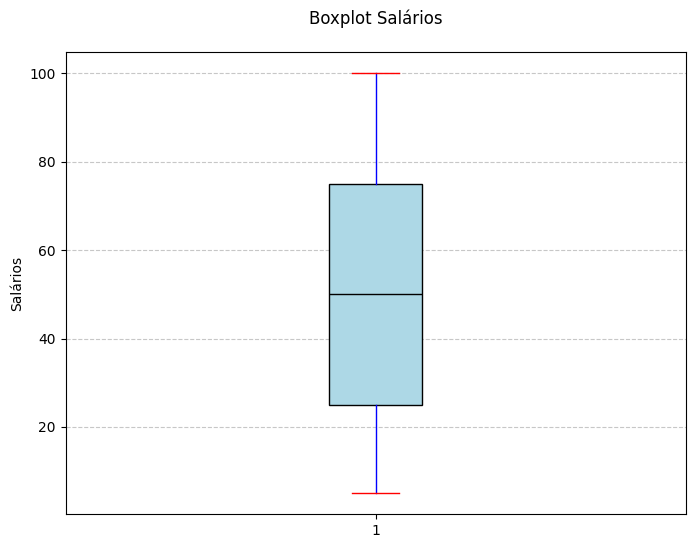

In [41]:
# Boxplot individual detalhado
plt.figure(figsize=(8, 6))
plt.boxplot(df['Salários'], vert=True, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           whiskerprops=dict(color='blue'),
           capprops=dict(color='red'),
           medianprops=dict(color='black'))
plt.title("Boxplot Salários", pad=20)
plt.ylabel("Salários")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()